# Examen 2

Nombre: Román Tamez Vidal Tamayo Tamez

### Física Computacional 2025-2

Resuelva los siguientes ejercicios.

In [1]:
import matplotlib
# Para el formato de las gráficas
matplotlib.rcParams.update(
    {
        "font.family": "serif",
        "text.usetex": True,
        "pgf.rcfonts": False,
        "axes.unicode_minus": False,
        "font.size": 12,
        "pgf.preamble": "\n".join([ # Aún más formato
        r"\usepackage[utf8]{inputenc}",
        r"\usepackage[T1]{fontenc}",
        ])
    }
)

1. Utilice la biblioteca de ```scipy.special``` para realizar la gráfica de la función $\Gamma (x)$ en el intervalo (0,5]. Ajuste la imagen de la gráfica para que el eje vertical se encuentre en el intervalo $[0,5]$ y el eje horizontal en el dominio antes mencionado.

In [2]:
import scipy.special as sp
import numpy as np
import matplotlib.pyplot as plt

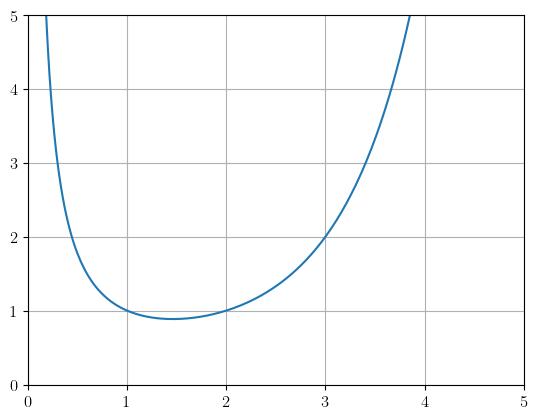

In [3]:
x = np.linspace(1e-8,5,300)
y = sp.gamma(x)

plt.plot(x,y)
plt.xlim(0,5), plt.ylim(0,5), plt.grid()
plt.show()

2. Se tiene la ecuación diferencial para $P(t)$

$$
\frac{dP}{dt} = rP \left( 1 - \frac{P}{P_c} \right)
$$

donde $r$ y $P_c$ son constantes positivas. Genere una función que se pueda utilizar para realizar una integración numérica de la ecuación diferencial y que además tenga como argumentos opcionales las dos constantes anteriores.

In [4]:
def edo_2(t, P, r, Pc):
    return np.array([r*P*(1-P/Pc)])

def integrar_RK4(f, ts, sol0, r, Pc):
    """
    Integra la EDO usando el método de Runge-Kutta de cuarto orden.
    f: función que define el sistema
    ts: tiempos
    sol0: condiciones iniciales
    r, Pc: argumentos de f
    """
    sols = np.zeros((len(ts), len(sol0)))
    sols[0] = sol0
    h = abs(ts[1]-ts[0])

    for i in range(1, len(ts)):
        t, sol = ts[i-1], sols[i-1]
        # Kuttas
        k1 = f(t        , sol, r, Pc)
        k2 = f(t + 0.5*h, sol + 0.5*h*k1, r, Pc)
        k3 = f(t + 0.5*h, sol + 0.5*h*k2, r, Pc)
        k4 = f(t +     h, sol +     h*k3, r, Pc)
        # Runges
        sols[i] = sol + h*f(t+h/2 ,sol + (h/6)*(k1+2*k2+2*k3+k4), r, Pc)

    return sols

A continuación se muestra un ejemplo del uso de la función de integración numérica.

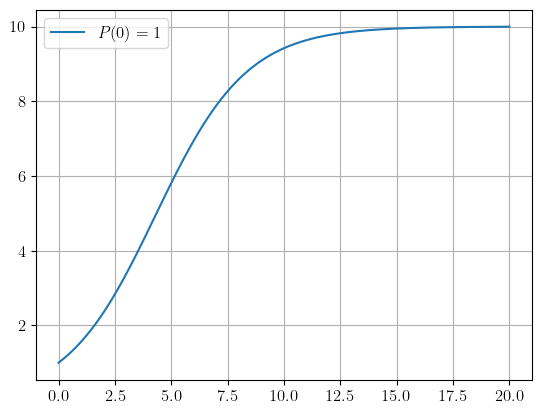

In [5]:
r, Pc = 0.5, 10
t0, tf = 0, 20
ts = np.linspace(t0, tf, 200)
# Condiciones iniciales
P0s = [i for i in range(1,20,2)]

P = integrar_RK4(edo_2, ts, [P0s[0]], r, Pc)
plt.plot(ts, P, label=r'$P(0)=1$')
plt.grid(), plt.legend()
plt.show()

3. Utilice la función [solve_ivp](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html) de scipy para encontrar la solución numérica de la ecuación anterior para $r=0.5$, $P_c = 10$ y las condiciones iniciales $P(0) = \{1,3,5, ... 19 \}$. Elija un intervalo de integración donde se vea la tendencia de cada una de las soluciones y ponga todas las soluciones en una sola gráfica.

In [6]:
from scipy.integrate import solve_ivp

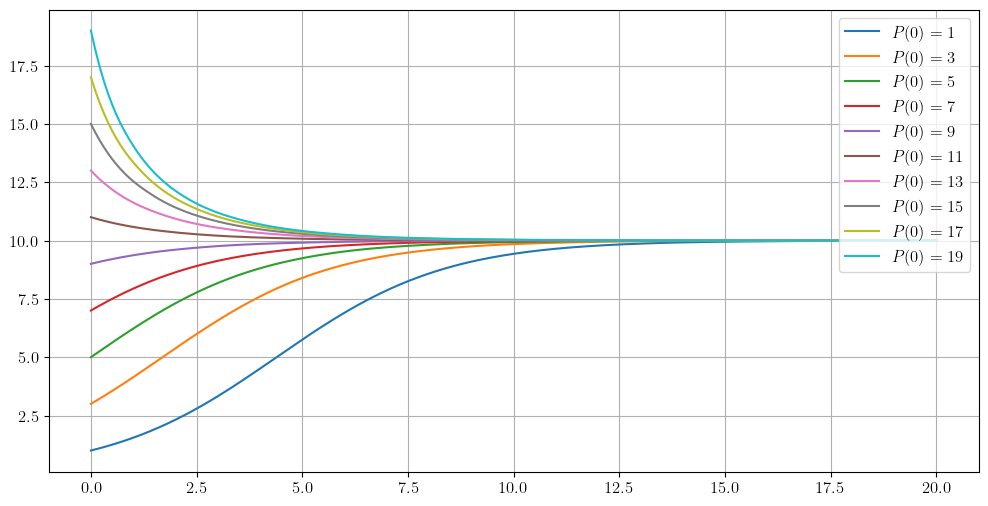

In [7]:
sols = [""]*len(P0s)
plt.figure(figsize=(12,6))

for i in range(len(P0s)):
    P = solve_ivp(
            edo_2,
            [t0, tf],
            [P0s[i]],
            args=(r, Pc,),
            dense_output=True
        )

    sols[i] = P.sol(ts)
    plt.plot(ts, sols[i][0], label=r'$P(0)={}$'.format(P0s[i]))

plt.grid(), plt.legend(loc='upper right')
plt.show()

Resulta claro que las soluciones todas tienden a 10.

4. Tome la solución con $P(0)=3$ del problema anterior. Encuentre la máxima diferencia dicha solución y la función
$$
P(t) = \frac{ 30e^{t/2} }{ 10+3(e^{t/2} -1)}
$$

In [8]:
def func_Pt(t):
    return 30*np.exp(t/2)/(10 + 3*(np.exp(t/2) - 1))

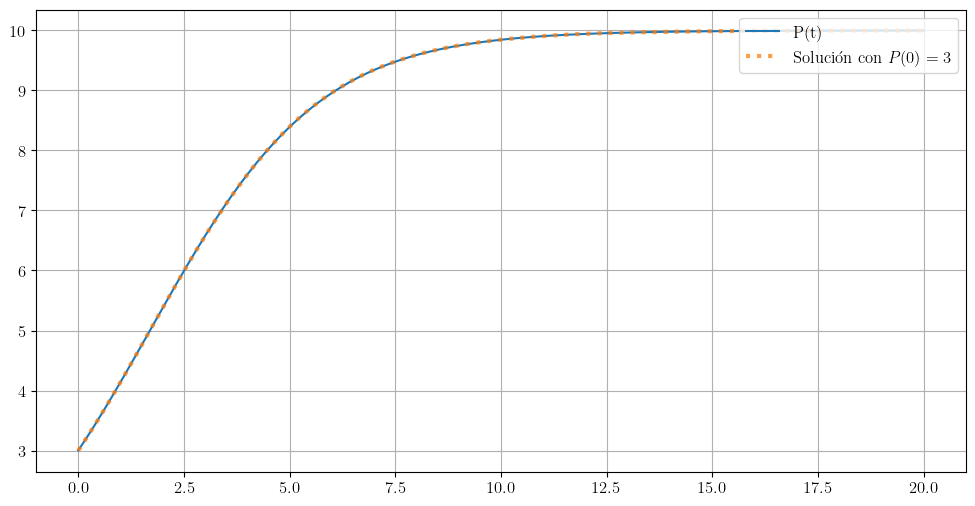

In [9]:
y = func_Pt(ts)

plt.figure(figsize=(12,6))
plt.plot(ts, y, label='P(t)')
plt.plot(ts, sols[1][0], label='Solución con $P(0)=3$', alpha=0.75, linestyle='dotted', linewidth=3)
plt.grid(), plt.legend(loc='upper right')
plt.show()

$P(t)$ parece ser la solución analítica de la edo con la condición inicial $P(0)=3$. 

In [10]:
max_diff = max(abs(y - sols[1][0]))
print('Máxima diferencia: ', max_diff)

Máxima diferencia:  0.004732313618978523


$\mathbb{B} \hat u \dot e \eta \alpha$   $\;\;$ $\sum \hat u \dot e \rho \tau \dot e$